# Imports 

In [1]:
print('hi')

hi


In [2]:
import sys
sys.path

['C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram\\Multimode-Conditional-Displacements\\hpc_runs\\multimode_circle_grape\\Grape on multiple modes',
 'C:\\Users\\Eesh Gupta\\anaconda\\python38.zip',
 'C:\\Users\\Eesh Gupta\\anaconda\\DLLs',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib',
 'C:\\Users\\Eesh Gupta\\anaconda',
 '',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages',
 'c:\\users\\eesh gupta\\documents\\ru research\\chakram\\qoc',
 'c:\\users\\eesh gupta\\documents\\ru research\\chakram\\quantum-optimal-control',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\win32',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Eesh Gupta\\.ipython']

In [3]:
%matplotlib inline
import os
import sys
import inspect
import numpy as np
from scipy.special import factorial
import h5py

#data_path = '/data'     ... data path specified later
#data_path
#initial_pulse = '../pulses/example_pulses/transmon_cat_initial_pulse.h5'
from h5py import File
import matplotlib.pyplot as plt
from pylab import*
from qutip import*

from scipy import interpolate
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)


In [4]:
from quantum_optimal_control.helper_functions.grape_functions import *
from quantum_optimal_control.main_grape.grape import Grape
from quantum_optimal_control import*

In [5]:
%load_ext autoreload
%autoreload 2

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

# 3DMM2 parameters

In [54]:
# chi = Peak splitting MHz
chis = 2*array([-33, -33]) 
kappas  = array([0,0]) # kHz

# Multimode circle grape

In [22]:
#TODO: Figure out why relative import doesn't work
from circle_grape_v3 import *

In [23]:
transmon_levels = 2

#  Params :  $\alpha = 30.0 , \delta_c = 0$ GHz, $\tau = 500$ ns, $\Omega_{max} =100$ MHz

In [55]:
mode = 2
mode_levels = 5
chi,kappa = chis[:mode],kappas[:mode]
chi = [i*1e-6 for i in chi]
kappa = [i*1e-6 for i in kappa]
circle_grape_params = {"chis":chi,"kappas":kappa,"alpha":30.0,"delta_c":0}

op = multimode_circle_grape_optimal_control(mode_state_num = mode_levels,
                                            number_of_modes = mode,hparams = circle_grape_params,add_disp_kerr=False)




In [56]:
circle_grape_params['chis']

[-6.599999999999999e-05, -6.599999999999999e-05]

In [47]:
chi

array([-6.6e-11, -6.6e-11])

In [26]:
op.mmnum

2

In [10]:
import sys
sys.path

['C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram\\Multimode-Conditional-Displacements\\hpc_runs\\multimode_circle_grape\\Grape on multiple modes',
 'C:\\Users\\Eesh Gupta\\anaconda\\python38.zip',
 'C:\\Users\\Eesh Gupta\\anaconda\\DLLs',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib',
 'C:\\Users\\Eesh Gupta\\anaconda',
 '',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages',
 'c:\\users\\eesh gupta\\documents\\ru research\\chakram\\qoc',
 'c:\\users\\eesh gupta\\documents\\ru research\\chakram\\quantum-optimal-control',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\win32',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Eesh Gupta\\anaconda\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Eesh Gupta\\.ipython']

In [11]:
data_path = ''#'/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow/data'

In [12]:
states_forbidden_list = []
total_time = 500.0
steps  = 200 #number of points over the total time where amplitudes will be specified

convergence = {'rate': 0.1, 'update_step': 10, 'max_iterations': 10,
               'conv_target': 3e-4, 'learning_rate_decay': 500.0}


reg_coeffs = {'dwdt': 0.1, 'd2wdt2': 1.0e-3, 'forbid_dressed': False,
              'states_forbidden_list':states_forbidden_list,
              'forbidden_coeff_list': [1.0*steps] * len(states_forbidden_list)}



initial_guess = None



In [62]:
qubit_drive_amp = 0.1 # Ghz
ss = op.run_optimal_control(state_transfer = True, initial_states = [1], target_states = [mode_levels + 1], 
                        total_time = total_time, steps = steps,max_amp = qubit_drive_amp, 
                        taylor_terms = None,is_dressed=False, 
                        convergence = convergence, reg_coeffs =  reg_coeffs,
                        plot_only_g = True,
                        states_forbidden_list = states_forbidden_list,initial_guess = initial_guess, 
                        file_name="g0_to_g1_circlgrape", data_path=data_path, save = True)


[2, 4, 4]
starting states:
[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]
target states:
[array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]
[]
data saved at: /home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow/data\00000_g0_to_g1_circlgrape.h5


c:\users\eesh gupta\documents\ru research\chakram\quantum-optimal-control\quantum_optimal_control\helper_functions\data_management.py:13: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  h5py.File.__init__(self, *args, **kwargs)


OSError: Unable to create file (unable to open file: name = '/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow/data\00000_g0_to_g1_circlgrape.h5', errno = 2, error message = 'No such file or directory', flags = 15, o_flags = 502)

In [ ]:
fids

Text(0, 0.5, 'errors')

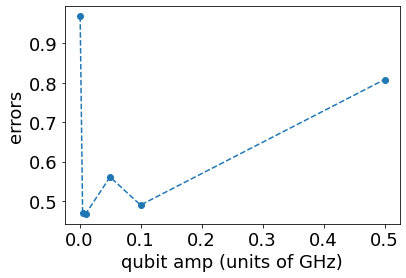

In [68]:
import matplotlib.pyplot as plt
plt.plot(amps, fids, marker = 'o', linestyle = '--')
plt.xlabel('qubit amp (units of GHz)')
plt.ylabel('errors')

In [3]:
import numpy as np 
np.log10(10)

1.0

Text(0.5, 1.0, 'g0->g1; 1000 microseconds')

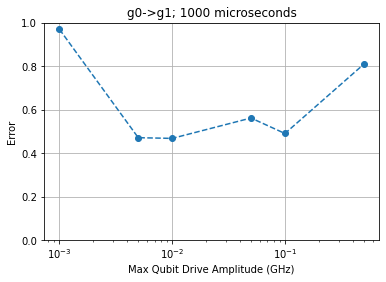

In [11]:
import matplotlib.pyplot as plt
amps = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
errs= [0.96918666, 0.4705422, 0.4672778, 0.5610303, 0.4898126, 0.8084305]
plt.semilogx(amps, errs, marker = 'o', linestyle = '--')
plt.grid(True)
#plt.plot(amps, fids, )
plt.xlabel('Max Qubit Drive Amplitude (GHz)')
plt.ylabel('Error')
plt.ylim([0,1])
plt.title('g0->g1; 1000 microseconds')

[0.96918666, 0.4705422, 0.4672778, 0.5610303, 0.4898126, 0.8084305]

In [ ]:
hf = op.openfile()

In [ ]:
hf['error'][-1]

In [ ]:
op.plot_pulses()

In [ ]:
ss

In [ ]:
len(ss[0][0])

In [ ]:
op.fidelity()

In [ ]:
import os 
data_path = '/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow/data'
file_path = 'test.h5'
file_path_f = os.path.join(data_path, file_path)
file_path_f

In [ ]:
hf = h5py.File(file_path_f, 'w')


In [ ]:
get_dressed_info

In [ ]:
w_c, v_c, dressed_id = get_dressed_info(op.H_rot())

In [ ]:
w_c

In [ ]:
v_c

In [ ]:
dressed_id